In [2]:
# AMDG
import stim
import numpy as np
import itertools
from copy import copy
from copy import deepcopy
from random import random
import sys
import matplotlib.pyplot as plt

In [29]:
from random import randint

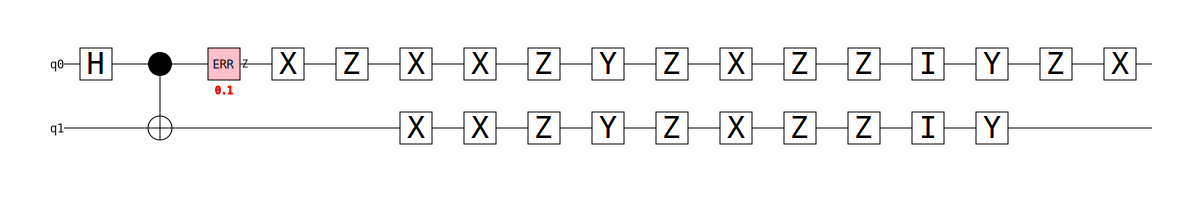

In [93]:
def bell_with_twirling(F, num_iterations, gate_set=["I", "X", "Y", "Z"], qubit_positions=[0,1]):
    circuit = stim.Circuit()
    circuit.append_operation("H", [0])
    circuit.append_operation("CNOT", [0,1])
    circuit.append_operation("Z_ERROR", [0], 1-F)
    # Transform from mostly phi_plus to psi_minus
    circuit.append_operation("X", [0])
    circuit.append_operation("Z", [0])
    for i in range(num_iterations):
        # equal probability applications:
        circuit.append(gate_set[randint(0, len(gate_set)-1)], qubit_positions)
    # Transform back to phi_plus
    circuit.append_operation("Z", [0])
    circuit.append_operation("X", [0])
    return circuit

circuit = bell_with_twirling(0.9, 10)
circuit.diagram(type="timeline-svg")

In [103]:
def add_twirling(circuit, num_iterations, qubit_positions, gate_set=["I", "X", "Y", "Z"]):
    # Transform from mostly phi_plus to psi_minus
    circuit.append_operation("X", qubit_positions[0])
    circuit.append_operation("Z", qubit_positions[0])
    for i in range(num_iterations):
        # equal probability applications:
        circuit.append(gate_set[randint(0, len(gate_set)-1)], qubit_positions)
    # Transform back to phi_plus
    circuit.append_operation("Z", qubit_positions[0])
    circuit.append_operation("X", qubit_positions[0])
    return circuit

In [92]:
"""
In this function, we're going to estimate the fidelity of the state generated in the previous circuit with respect
to phi_minus. If the initial fidelity of the state with respect to phi_plus is F, then the corresponding Fidelity
with respect to phi_minus of the initial state should be 1-F. 

What we want to see is the average Fidelity after the twirling with respect to phi_minus decrease from (1-F)
"""
def estimate_fidelity(num_trials, F, num_iterations, gate_set=["I", "X", "Y", "Z"]):
    ave_fidelity = 0
    phi_minus = [1/np.sqrt(2),0.,0.,-1/np.sqrt(2)]
    for i in range(num_trials):
        simulator = stim.TableauSimulator()
        circuit = bell_with_twirling(F, num_iterations, gate_set)
        simulator.do(circuit)
        sv = simulator.state_vector()
        ave_fidelity += np.inner(phi_minus, sv)
    print(f"Average fidelity: {ave_fidelity / num_trials}")

full_gate_list = [
    "I",
    "X",
    "Y",
    "Z",
    "C_XYZ",
    "C_ZYX",
    "H",
    "H_XY",
    "H_XZ",
    "H_YZ",
    "S",
    "SQRT_X",
    "SQRT_X_DAG",
    "SQRT_Y",
    "SQRT_Y_DAG",
    "SQRT_Z",
    "SQRT_Z_DAG",
    "S_DAG"
]
F = 0.7
estimate_fidelity(10000, F, 10, full_gate_list)
print(f"Expected fidelity: {(1-F)/3}")

# Amazingly, this is a gate set that works. It's a total hack, but perhaps I can worry about this later.

Average fidelity: (0.10129999826632331+0j)
Expected fidelity: 0.10000000000000002


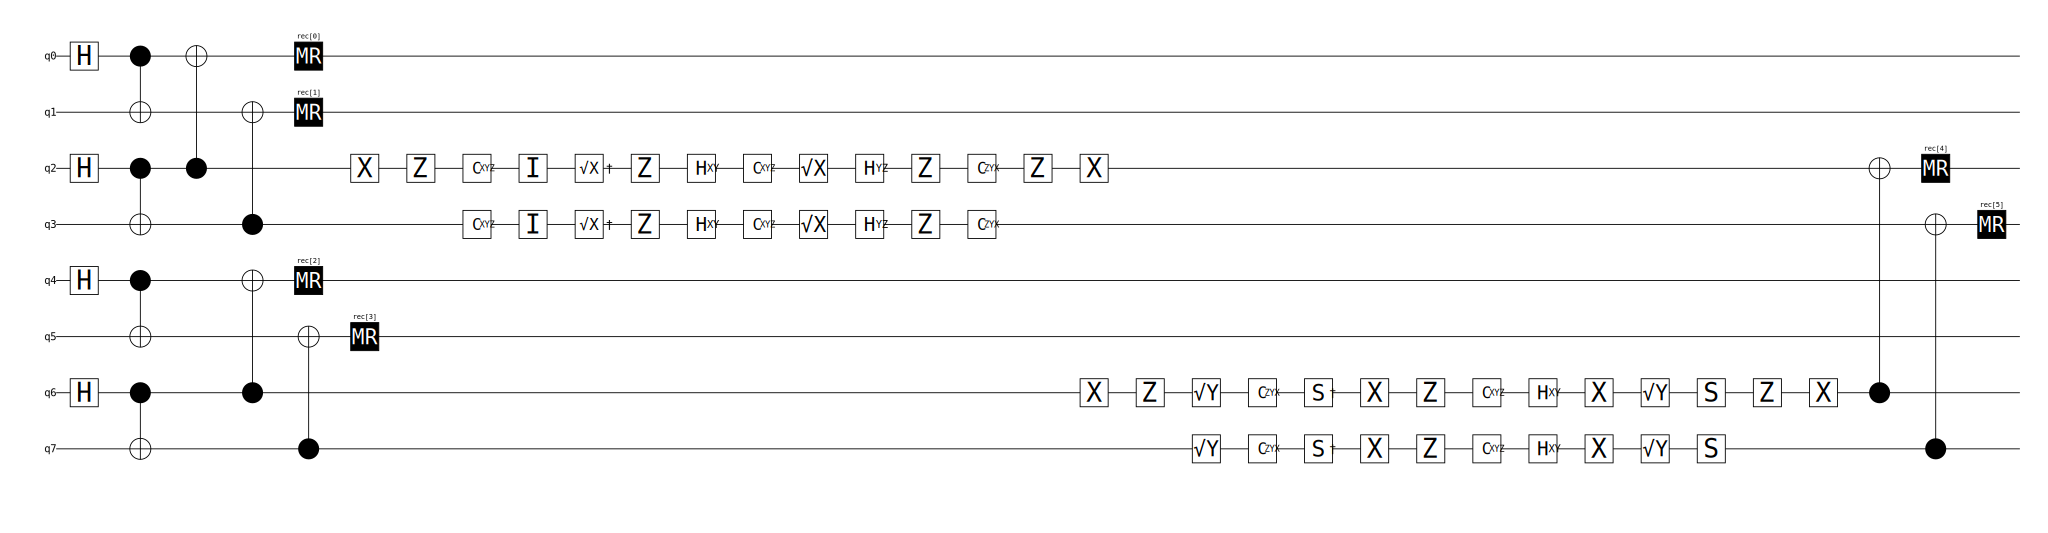

In [108]:
# Purification test:
circuit = stim.Circuit()
circuit.append_operation("H", [0,2,4,6])
circuit.append_operation("CNOT", [0,1,2,3,4,5,6,7])
circuit.append_operation("CNOT", [2,0,3,1,6,4,7,5])
circuit.append_operation("MR",[0,1,4,5])
add_twirling(circuit, 10, [2,3], full_gate_list)
add_twirling(circuit, 10, [6,7], full_gate_list)
circuit.append_operation("CNOT",[6,2,7,3])
circuit.append_operation("MR",[2,3])
circuit.diagram(type="timeline-svg")